In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

# Analisando os dados

In [2]:
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
# Verificando as tipos de dados.
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
# Verificando a existencia de registros duplicados
df_titanic.duplicated().sum()

0

#### Pudemos verificar que:
1. Campos que possuem valores nulos: `Age`, `Cabin` e `Embarked`.
2. Valores de `Age` estão como `float` onde deveriam ser `int`.

# Tratamento dos dados

> Tratando os valores nulos.

In [37]:
# Tratando os valores nulos de Age.
age_means = df_titanic['Age'].mean()
df_titanic['Age'].fillna(age_means, inplace=True)

# Tratando os valores de nulos Cabin.
df_titanic['Cabin'].fillna('Uninformed', inplace=True)

# Tratando os valores de nulos Embarked.
df_titanic['Embarked'].fillna('Uninformed', inplace=True)

# Verifica se todos os valores nulos foram corrigidos.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.1+ KB


> Tratando tipos de dados.

In [38]:
# Convertendo Age de float para int
df_titanic['Age'] = df_titanic['Age'].astype(int)
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Perguntas

## 1. Dentre os sobreviventes, quais foram os fatores que colaboraram para que sobrevivessem?

In [41]:
# Cria um df com os sobreviventes.
df_survived = df_titanic.query('Survived == "1"')
# Cria um df de mulheres sobreviventes
df_surv_fem = df_survived.query('Sex == "female"')
#Cria um df de homens sobreviventes
df_surv_mal = df_survived.query('Sex == "male"')

In [47]:
# Total de sobreviventes
print('Sobreviventes: {}'.format(df_survived.shape[0]))
print('==========================')
# Total de homens sobreviventes
print('Homens: {}'.format(df_surv_mal.shape[0]))
# Total de homens sobreviventes com ou sem familiares abordo
print('Com familiares abordo: {}'.format(df_surv_mal.query('SibSp > 0 and Parch > 0').shape[0]))
print('Sem familiares abordo: {}'.format(df_surv_mal.query('SibSp == 0 or Parch == 0').shape[0]))
# Total de Homens por classe de bilhete
print('Primeira classe {}'.format(df_surv_mal.query('Pclass == 1').shape[0]))
print('Segunda classe {}'.format(df_surv_mal.query('Pclass == 2').shape[0]))
print('Terceira classe {}'.format(df_surv_mal.query('Pclass == 3').shape[0]))
print('==========================')
# Total de mulheres sobreviventes
print('Mulheres: {}'.format(df_surv_fem.shape[0]))
# Total de mulheres sobreviventes com ou sem familiares abordo
print('Com familiares abordo: {}'.format(df_surv_fem.query('SibSp > 0 and Parch > 0').shape[0]))
print('Sem familiares abordo: {}'.format(df_surv_fem.query('SibSp == 0 or Parch == 0').shape[0]))
# Total de mulheres por classe de bilhete
print('Primeira classe {}'.format(df_surv_fem.query('Pclass == 1').shape[0]))
print('Segunda classe {}'.format(df_surv_fem.query('Pclass == 2').shape[0]))
print('Terceira classe {}'.format(df_surv_fem.query('Pclass == 3').shape[0]))

Sobreviventes: 342
Homens: 109
Com familiares abordo: 20
Sem familiares abordo: 89
Primeira classe 45
Segunda classe 17
Terceira classe 47
Mulheres: 233
Com familiares abordo: 42
Sem familiares abordo: 191
Primeira classe 91
Segunda classe 70
Terceira classe 72


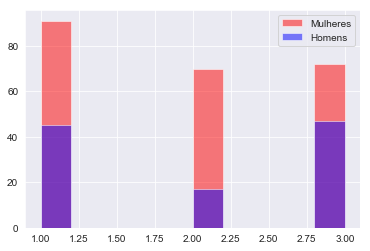

In [48]:
# Histograma de mulheres/homens sobreviventes por classe de bilhete
plt.hist(df_surv_fem.Pclass, color='red', alpha=0.5, label='Mulheres')
plt.hist(df_surv_mal.Pclass, color='blue', alpha=0.5, label='Homens')
plt.legend()
plt.show()

> Pudemos detectar que a maior parte dos sobreviventes foram mulheres com bilhetes de primeira classe.

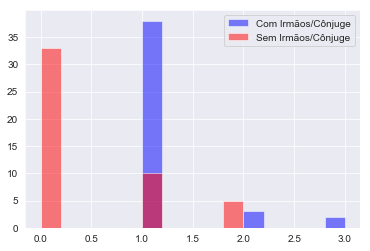

In [57]:
# Histograma de mulheres com ou sem irmãos/conjuge
plt.hist(df_surv_fem.query('Pclass == 1 and SibSp > 0').SibSp, color='blue', alpha=0.5, label='Com Irmãos/Cônjuge')
plt.hist(df_surv_fem.query('Pclass == 1 and SibSp == 0').Parch, color='red', alpha=0.5, label='Sem Irmãos/Cônjuge')
plt.legend()
plt.show()

> Pudemos perceber que das mulheres com bilhete de primeira classe, as que tiveram maior exito em sobreviver, possuiam irmãos ou cônjuge abordo.

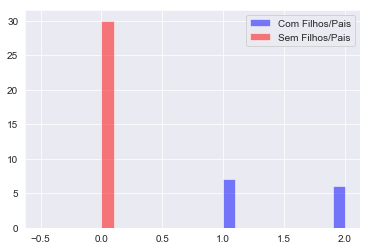

In [56]:
# Histograma de mulheres com ou sem pais/filhos
plt.hist(df_surv_fem.query('Pclass == 1 and SibSp > 0 and Parch > 0').Parch, color='blue', alpha=0.5, label='Com Filhos/Pais')
plt.hist(df_surv_fem.query('Pclass == 1 and SibSp > 0 and Parch == 0').Parch, color='red', alpha=0.5, label='Sem Filhos/Pais')
plt.legend()
plt.show()

> Pudemos perceber que das mulheres com bilhete de primeira classe, irmãos ou cônjuge, as que tiveram maior exito em sobreviver, não pussuiam filhos os pais abordo.

## 2. Dentre os não sobreviventes, quais fatores contribuiram para esse desfecho.

In [25]:
# Cria um df com os não sobreviventes
df_not_survivors = df_titanic.query('Survived == 0')
# Cria um df com as mulheres não sobreviventes
df_not_surv_fem = df_not_survivors.query('Sex == "female"')
# Cria um df com os homens não sobreviventes
df_not_sur_mal =df_not_survivors.query('Sex == "male"')

In [46]:
# Total de não sobreviventes
print('Não Sobreviventes: {}'.format(df_not_survivors.shape[0]))
print('==========================')
# Total de homens não sobreviventes
print('Homens: {}'.format(df_not_sur_mal.shape[0]))
# Total de homens com parentes abordo
print('Com familiares abordo: {}'.format(df_not_sur_mal.query('SibSp > 0 and Parch > 0').shape[0]))
print('Sem familiares abordo: {}'.format(df_not_sur_mal.query('SibSp == 0 or Parch == 0').shape[0]))
# Total de homens por classe de bilhete
print('Primeira classe {}'.format(df_not_sur_mal.query('Pclass == 1').shape[0]))
print('Segunda classe {}'.format(df_not_sur_mal.query('Pclass == 2').shape[0]))
print('Terceira classe {}'.format(df_not_sur_mal.query('Pclass == 3').shape[0]))
print('==========================')
# Total de mulheres não sobreviventes
print('Mulheres: {}'.format(df_not_surv_fem.shape[0]))
# Total de mulheres com parentes abordo
print('Com familiares abordo: {}'.format(df_not_surv_fem.query('SibSp > 0 and Parch > 0').shape[0]))
print('Sem familiares abordo: {}'.format(df_not_surv_fem.query('SibSp == 0 or Parch == 0').shape[0]))
# Total de mulheres por classe de bilhete
print('Primeira classe {}'.format(df_not_surv_fem.query('Pclass == 1').shape[0]))
print('Segunda classe {}'.format(df_not_surv_fem.query('Pclass == 2').shape[0]))
print('Terceira classe {}'.format(df_not_surv_fem.query('Pclass == 3').shape[0]))

Não Sobreviventes: 549
Homens: 468
Com familiares abordo: 50
Sem familiares abordo: 418
Primeira classe 77
Segunda classe 91
Terceira classe 300
Mulheres: 81
Com familiares abordo: 30
Sem familiares abordo: 51
Primeira classe 3
Segunda classe 6
Terceira classe 72


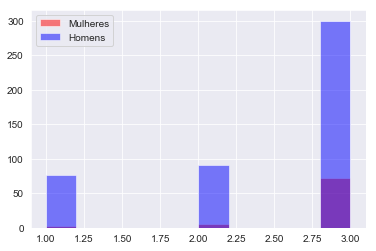

In [27]:
# Histograma de mulheres/homens não sobreviventes por classe de bilhete
plt.hist(df_not_surv_fem.Pclass, color='red', alpha=0.5, label='Mulheres')
plt.hist(df_not_sur_mal.Pclass, color='blue', alpha=0.5, label='Homens')
plt.legend()
plt.show()

> Pudemos perceber que a maior parte dos que não sobreviveram, eram homens com bilhetes de terceira classe.

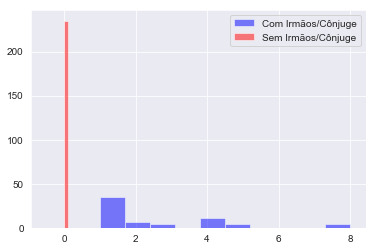

In [60]:
# Histograma de homens com ou sem irmãos/conjuge
plt.hist(df_not_sur_mal.query('SibSp > 0 and Pclass == 3').SibSp, color='b', alpha=0.5, label='Com Irmãos/Cônjuge')
plt.hist(df_not_sur_mal.query('SibSp == 0 and Pclass == 3 ').SibSp, color='r', alpha=0.5, label='Sem Irmãos/Cônjuge')
plt.legend()
plt.show()

> Pudemos perceber que dos homens não sobreviventes com bilhete de terceira classe, 
o maior ídice de mortalidade ficou com os que não possuiam Irmãos ou Cônjuge.

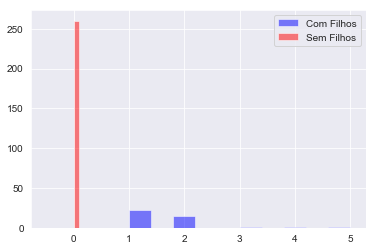

In [65]:
# Histograma de homens com ou sem pais/filhos
plt.hist(df_not_sur_mal.query('Parch > 0 and Pclass == 3').Parch, color='b', alpha=0.5, label='Com Filhos')
plt.hist(df_not_sur_mal.query('Parch == 0 and Pclass == 3').Parch, color='r', alpha=0.5, label='Sem Filhos')
plt.legend()
plt.show()

> Pudemos detectar que, dos homens que não sobreviverame que possuiam bilhete de terceira classe, a maioria não possuiam pais ou filhos.

## 3. De todos os tripulantes. Como a classe social interferiu em quem sobreviveu ou não?

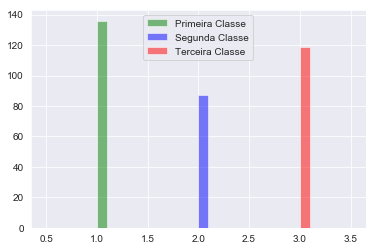

In [35]:
# Histograma de sobreviventes por classe de bilhete
plt.hist(df_survived.query('Pclass == 1').Pclass, color='g', alpha=0.5, label='Primeira Classe')
plt.hist(df_survived.query('Pclass == 2').Pclass, color='b', alpha=0.5, label='Segunda Classe')
plt.hist(df_survived.query('Pclass == 3').Pclass, color='r', alpha=0.5, label='Terceira Classe')
plt.legend()
plt.show()

> Pudemos perceber que tripulantes com bilhete de primeira classe obtiveram maior exito em sobreviver.

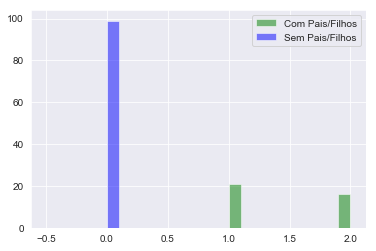

In [75]:
# Histograma de sobreviventes com bilhete de primeira classe
# que não possuiam filhos ou pais abordo.
plt.hist(df_survived.query('Pclass == 1 and Parch > 0').Parch, color='g', alpha=0.5, label='Com Pais/Filhos')
plt.hist(df_survived.query('Pclass == 1 and Parch == 0').Parch, color='b', alpha=0.5, label='Sem Pais/Filhos')
plt.legend()
plt.show()

> Pudemos perceber que tripulante da primeira classe, que não tinham pais ou filhos, tiveram maior sucesso em sobreviver.

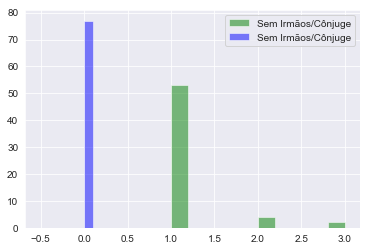

In [77]:
# Histograma de sobreviventes com bilhete de primeira classe
# que não possuiam cônjuge ou irmãos abordo.
plt.hist(df_survived.query('Pclass == 1 and SibSp > 0').SibSp, color='g', alpha=0.5, label='Sem Irmãos/Cônjuge')
plt.hist(df_survived.query('Pclass == 1 and SibSp == 0').SibSp, color='b', alpha=0.5, label='Sem Irmãos/Cônjuge')
plt.legend()
plt.show()

> Pudemos perceber que, tripulantes da primeira classe, que não tinham irmãos ou côjuge, tiveram maior sucesso em sobreviver.

# Resultado

> Gostaria de informar que, `esta análise não é definitiva`, e que, com estudos e técnicas mais refinadas, podemos obter outros resultados, mais elaborados e detalhados.

### Pudemos perceber que:
1. Pessoas com bilhetes de `primeira classe`, tiveram maiores chances de sobreviver que as demais.
2. `Mulheres` tiveram mais chances de sobreviver que `homens`.
3. Pessoas `sem vínculo familiar abordo`, tiveram maiores chances de sobreviver.
4. Pessoas de maior poder aquisitivo, tendem a viajar sem os familiares.
5. Em situação de risco de vida, `não` ter pessoas com quem se precupar, pode contribuir para a sobrevivência.
